In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('Social.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
194  15689751    Male   28            89000          0
195  15667742    Male   34            43000          0
196  15738448  Female   30            79000          0
197  15680243  Female   20            36000          0
198  15745083    Male   26            80000          0

[199 rows x 5 columns]

In [114]:
X = df.iloc[:, 2:4]
X

Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
194   28            89000
195   34            43000
196   30            79000
197   20            36000
198   26            80000

[199 rows x 2 columns]

In [115]:
y = df.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
194    0
195    0
196    0
197    0
198    0
Name: Purchased, Length: 199, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'X[0] <= 43.5\ngini = 0.17\nsamples = 139\nvalue = [126, 13]'),
 Text(0.25, 0.7, 'X[1] <= 116500.0\ngini = 0.088\nsamples = 130\nvalue = [124, 6]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 122\nvalue = [122, 0]'),
 Text(0.375, 0.5, 'X[0] <= 26.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.3, 'X[1] <= 117500.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.375, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.7, 'X[1] <= 54000.0\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

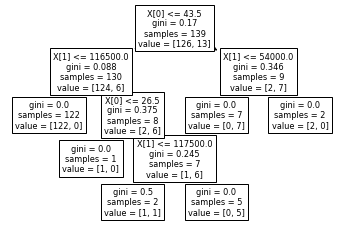

In [118]:
from sklearn import tree
tree.plot_tree(classifier)

In [119]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
cm

array([[47,  0],
       [ 4,  9]], dtype=int64)

In [121]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))

Accuracy:  0.9333333333333333


In [122]:
new_data_point = [[35, 35000]]

predicted_class = classifier.predict(new_data_point)

print("Predicted class for the new data point:", predicted_class)


Predicted class for the new data point: [0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [123]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, out_file='classtree.dot', feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])